## Part-1 (Binary Classification):

### 1.1 Data Munging

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import os
os.chdir("D:\\my 2nd\\Task 1")

#### Cleaning the data is essential when dealing with real world problems. Training and testing data is stored in "data/wisconsin_data" folder. You have to perform the following:

## Read the training and testing data & Print the number of features in the dataset

In [20]:
train=pd.read_csv("train_wbcd.csv")
test=pd.read_csv("test_wbcd.csv")

In [21]:
print(train.shape)
print(test.shape)

(100, 32)
(20, 32)


## For the data label, print the total number of B's and M's in the training and testing data. Comment on the class distribution. Is it balanced or unbalanced?

In [22]:
train.Diagnosis.value_counts()

B    58
M    42
Name: Diagnosis, dtype: int64

In [23]:
test.Diagnosis.value_counts()

B    14
M     6
Name: Diagnosis, dtype: int64

## Data is imbalanced but not highly. So we can take class_weight="balanced" while applying logistic regression.

## Print the number of features with missing entries

In [24]:
print(train.columns[train.isnull().any()].tolist())
print(test.columns[test.isnull().any()].tolist())

['f21']
['f21']


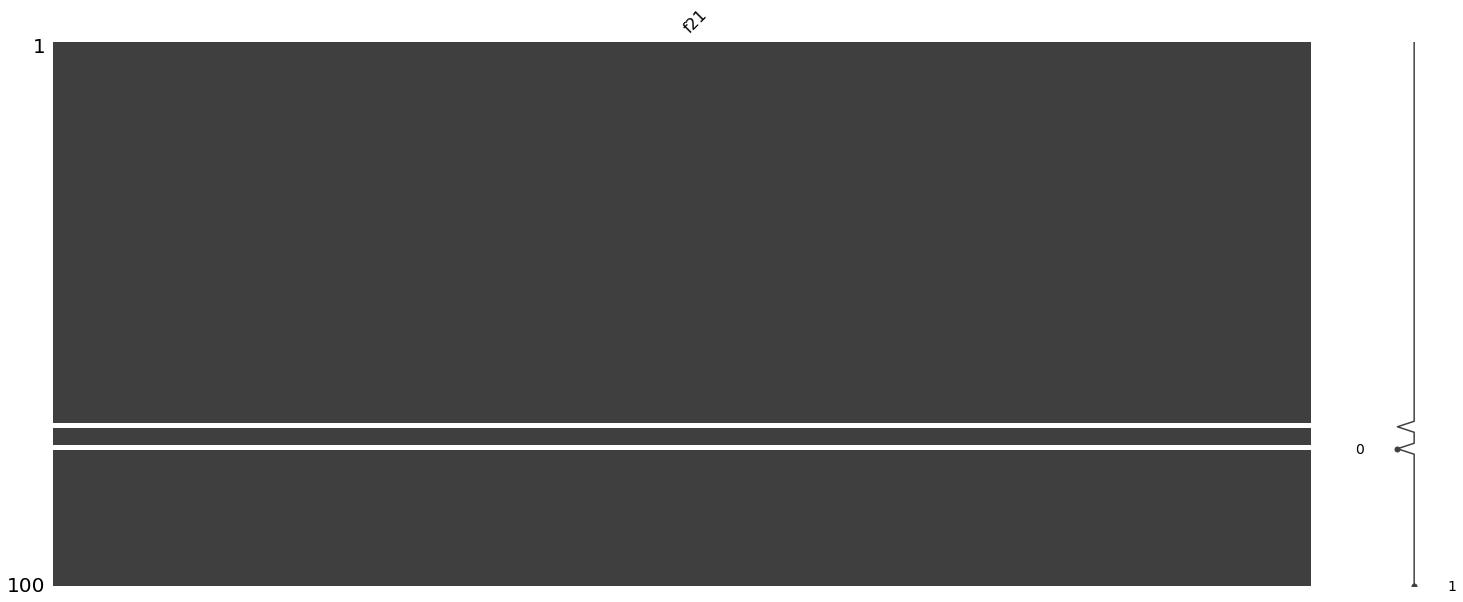

In [25]:
##for train dataset
import missingno
missingdata_df = train.columns[train.isnull().any()].tolist()
missingno.matrix(train[missingdata_df])

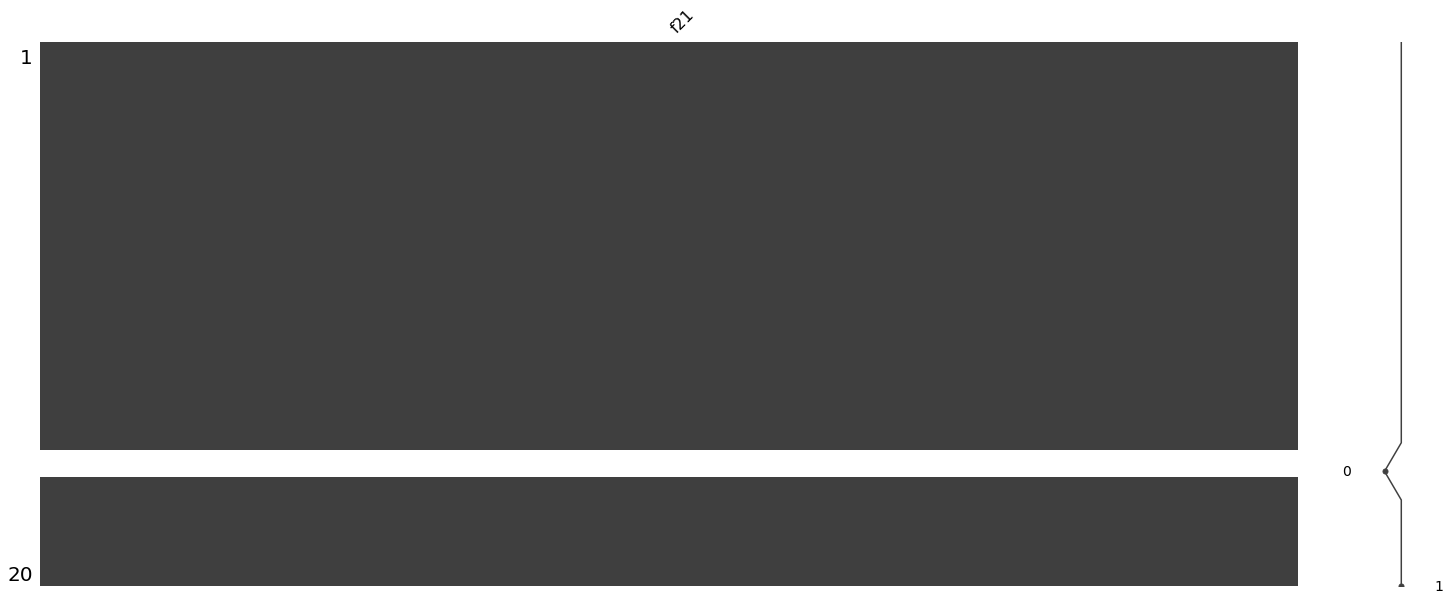

In [26]:
##for test dataset
import missingno
missingdata_df1 = test.columns[test.isnull().any()].tolist()
missingno.matrix(test[missingdata_df])

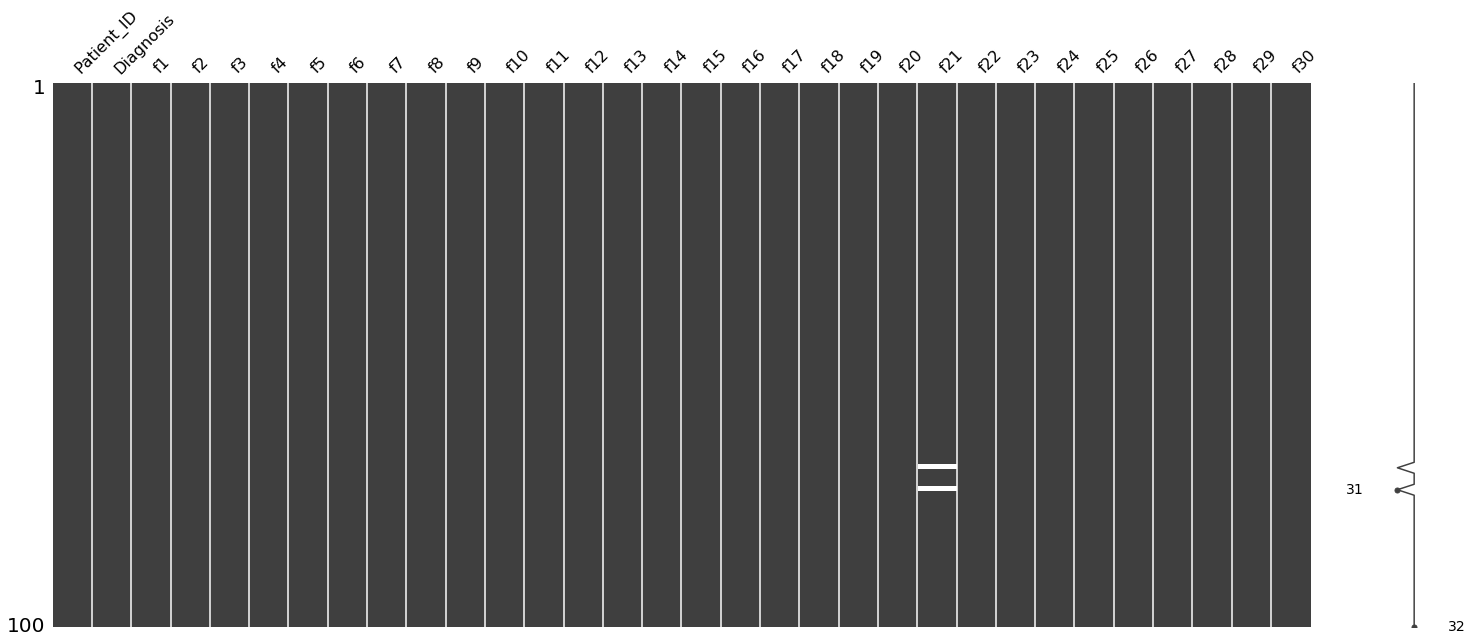

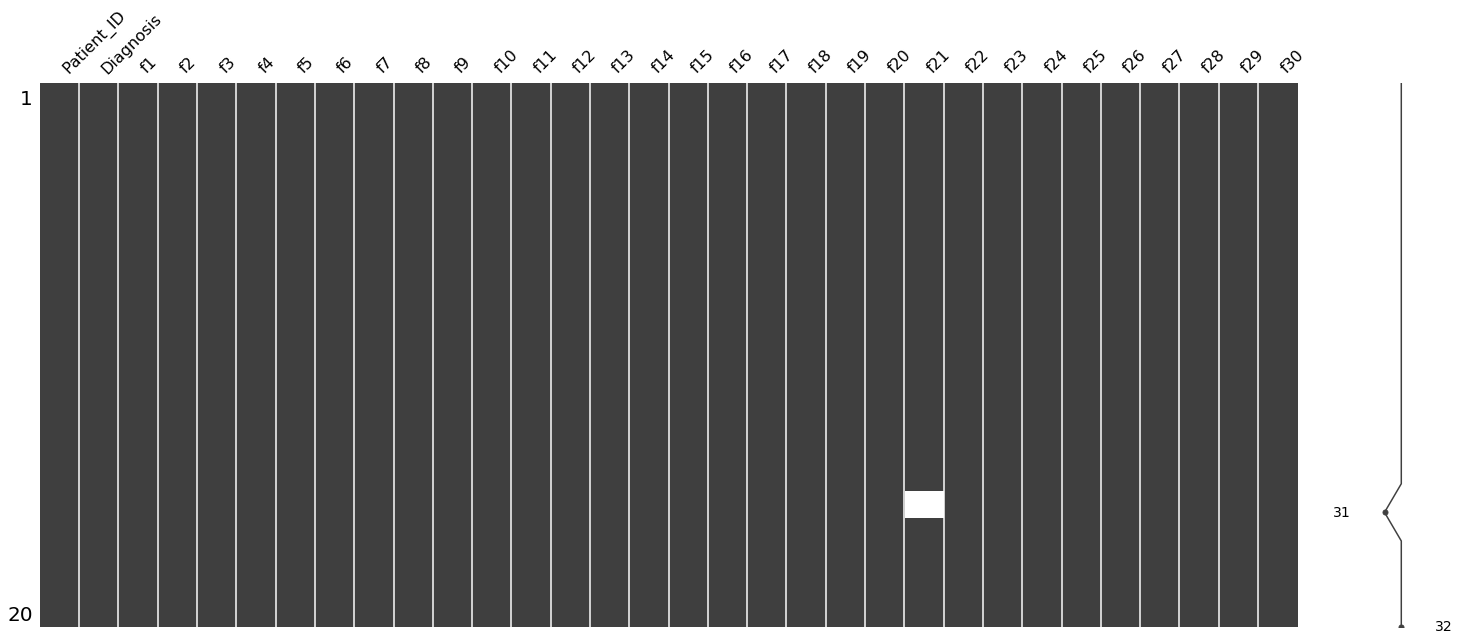

In [27]:
import missingno as msno
msno.matrix(train)
msno.matrix(test)# just to visualize. no missing value.

In [28]:
train.describe()

,Patient_ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,98.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.160791e+07,14.225920,19.207900,92.722600,666.375000,0.095696,0.106129,0.090364,0.049346,0.179893,...,16.486765,25.380800,108.925200,909.191000,0.132563,0.265144,0.278176,0.117597,0.289196,0.083999
std,2.737600e+07,3.729963,4.732476,25.924925,366.768846,0.013496,0.057694,0.084449,0.042066,0.027482,...,5.250147,6.689072,36.432902,597.843396,0.022108,0.161632,0.210617,0.075227,0.058586,0.014823
min,8.670000e+03,7.729000,10.820000,47.980000,178.800000,0.068830,0.023440,0.000000,0.000000,0.106000,...,9.077000,14.100000,57.170000,248.000000,0.071170,0.027290,0.000000,0.000000,0.156600,0.059050
25%,8.650350e+05,11.880000,15.607500,75.667500,430.825000,0.084645,0.062065,0.025070,0.019017,0.161700,...,13.052500,19.510000,84.055000,514.925000,0.119275,0.156575,0.093762,0.060362,0.246875,0.073960
50%,9.013015e+05,13.600000,18.805000,87.355000,572.050000,0.094985,0.096485,0.066145,0.032565,0.179700,...,15.315000,25.670000,98.245000,727.100000,0.134300,0.237700,0.256650,0.104250,0.279600,0.081660
75%,2.821689e+06,15.707500,21.917500,103.650000,768.325000,0.103825,0.130025,0.135875,0.076825,0.193400,...,19.147500,30.870000,125.450000,1110.250000,0.147875,0.357050,0.400900,0.173950,0.320600,0.093808
max,9.197970e+07,25.220000,32.470000,171.500000,1878.000000,0.132600,0.311400,0.426400,0.184500,0.255600,...,31.010000,45.410000,211.700000,2944.000000,0.187800,0.758400,0.960800,0.291000,0.475300,0.128400


In [29]:
train.f21.describe()

count    98.000000
mean     16.486765
std       5.250147
min       9.077000
25%      13.052500
50%      15.315000
75%      19.147500
max      31.010000
Name: f21, dtype: float64

### For filling any feature, we can use r mean or median value of the feature values from observed entries. I have choosed here median because I feel median imputation will work better because it is a number that is already present in the data set and is less susceptible to outlier errors as compared to mean imputation. Filled missing values with median beacause of good outliers

In [30]:
train.f21.fillna(train.f21.median(),inplace=True)
test.f21.fillna(test.f21.median(),inplace=True)

In [31]:
print(train.columns[train.isnull().any()].tolist())
print(test.columns[test.isnull().any()].tolist())

[]
[]


In [32]:
X_train=train.drop(["Patient_ID","Diagnosis"],axis=1)
Y_train=train["Diagnosis"]
X_test=test.drop(["Patient_ID","Diagnosis"],axis=1)
Y_test=test["Diagnosis"]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
print('X_train shape ', X_train.shape)
print('X_test shape ', X_test.shape)
print('Y_train shape ', Y_train.shape)
print('Y_test shape ', Y_test.shape)

(100, 30) (100,) (20, 30) (20,)
X_train shape  (100, 30)
X_test shape  (20, 30)
Y_train shape  (100,)
Y_test shape  (20,)


### Normalize the training and testing data.

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
Y_train=Y_train.replace(['B', 'M'], [0, 1])
Y_test=Y_test.replace(['B', 'M'], [0, 1])

### Now we have  train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
alpha=0.1
c=1/alpha
clf1= LogisticRegression(penalty='l1', C=10, solver='liblinear',class_weight="balanced")
clf1.fit(X_train_std, Y_train)
Y_pred=clf1.predict(X_test_std)
accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy is:{}'.format(accuracy))

accuracy is:0.95


In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[14  0]
 [ 1  5]]


In [41]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[14,  0],
       [ 1,  5]], dtype=int64)

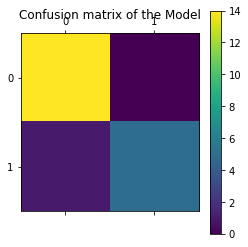

In [43]:
import pylab as pl
pl.matshow(cm)
pl.title('Confusion matrix of the Model')
pl.colorbar()
pl.show()

In [46]:
labels=[0,1]

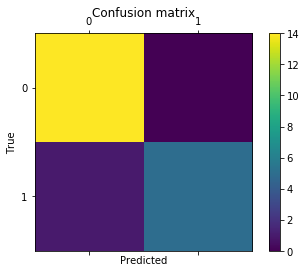

In [48]:
##2nd method
cm1 = confusion_matrix(Y_test, Y_pred,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
lam=0.1
c=1/lam
clf2= LogisticRegression(penalty='l2', C=c, solver='liblinear',class_weight="balanced")
clf2.fit(X_train_std, Y_train)
Y_pred1=clf2.predict(X_test_std)
accuracy=accuracy_score(Y_test,Y_pred1)
print('accuracy is:{}'.format(accuracy))

accuracy is:0.95


In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred1))

[[14  0]
 [ 1  5]]


### A- For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333} based on parameter P.

In [52]:
from sklearn.linear_model import LogisticRegression
alpha= [0.1,1,3,10,33,100,333,1000,3333,10000,33333]
C=[1 / x for x in alpha]
for c in C:
    clf3 = LogisticRegression(penalty='l1', C=c, solver='liblinear',class_weight="balanced")
    clf3.fit(X_train_std, Y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf3.coef_)
    print('Training accuracy:', clf3.score(X_train_std, Y_train))
    print('Test accuracy:', clf3.score(X_test_std, Y_test))
    print('')

C: 10.0
Coefficient of each feature: [[0.         0.00969812 0.06688608 1.06381363 0.         0.
  0.19197898 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         3.04502186 3.92248715 6.9011608  0.
  2.42829482 0.         0.         0.         0.25285979 0.92329334]]
Training accuracy: 1.0
Test accuracy: 0.95

C: 1.0
Coefficient of each feature: [[0.         0.         0.         0.         0.         0.
  0.         0.42560668 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.05479703 1.66323848 3.1060092  0.
  0.82307393 0.         0.41592794 0.17235238 0.18235674 0.21261723]]
Training accuracy: 1.0
Test accuracy: 0.95

C: 0.3333333333333333
Coefficient of each feature: [[0.         0.         0.         0.         0.         0.
  0.         0.31251968 0.         0.         0.         0.
  0.         0.         0.         0.         0.

### B- For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33} based on parameter P.

In [53]:
lam= [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,33]
C=[1 / x for x in lam]
for c in C:
    clf4 = LogisticRegression(penalty='l2', C=c, solver='liblinear',class_weight="balanced")
    clf4.fit(X_train_std, Y_train)
    print('C:', c)
    print('Coefficient of each feature is:', clf4.coef_)
    print('Training accuracy is:', clf4.score(X_train_std, Y_train))
    print('Test accuracy is:', clf4.score(X_test_std, Y_test))
    print('')

C: 1000.0
Coefficient of each feature is: [[ 2.30800719  2.43603174  2.28150424  2.30946564 -0.97998022 -0.43804591
   1.94481012  2.19145209 -0.07893154 -2.48942637  1.14624381  0.56194399
   1.16399016  1.29055453  1.61409959 -1.33316104 -0.96277373 -0.63697561
  -1.90772279  0.5126348   2.49280621  4.00124548  2.49441845  2.36709597
   2.85701292  0.66676139  1.13792138  1.46044474  2.28973769  2.68531559]]
Training accuracy is: 1.0
Test accuracy is: 0.95

C: 333.3333333333333
Coefficient of each feature is: [[ 1.96772945  2.13623168  1.94679901  1.96234383 -0.8197337  -0.35639264
   1.63702691  1.8761428  -0.03229645 -2.09840808  0.97972397  0.45561315
   1.01704256  1.1073311   1.32825889 -1.13018393 -0.81289511 -0.49514134
  -1.63735739  0.39945697  2.12784322  3.45907263  2.13097962  2.01594754
   2.43267803  0.59624352  1.00828154  1.30060553  1.97894283  2.26719255]]
Training accuracy is: 1.0
Test accuracy is: 0.95

C: 100.0
Coefficient of each feature is: [[ 1.64569431  1.850

### Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. Evaluate the prediction performance on the test data and report the following

### L1 regularization

In [54]:
best_alpha=0.1
clf5= LogisticRegression(penalty='l1', C=best_alpha, solver='liblinear',class_weight="balanced")
clf5.fit(X_train_std, Y_train)
Y_pred2=clf5.predict(X_test_std)
print(accuracy_score(Y_test,Y_pred2))

0.95


In [55]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



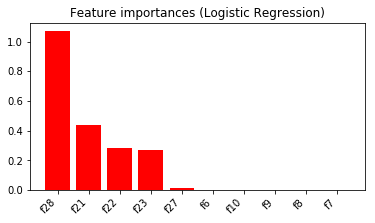

In [56]:
coefs = np.abs(clf5.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [57]:
print(confusion_matrix(Y_test, Y_pred2))

[[14  0]
 [ 1  5]]


### L2 regularization

In [58]:
best_lambda=0.001
c=1/best_lambda
clf6= LogisticRegression(penalty='l2', C=c, solver='liblinear',class_weight="balanced")
clf6.fit(X_train_std, Y_train)
Y_pred3=clf6.predict(X_test_std)
print(accuracy_score(Y_test,Y_pred3))

0.95


In [59]:
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

   micro avg       0.95      0.95      0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



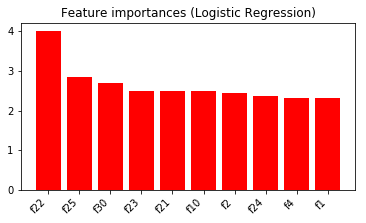

In [60]:
coefs = np.abs(clf6.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [61]:
print(confusion_matrix(Y_test, Y_pred3))

[[14  0]
 [ 1  5]]
